In [47]:
from sentence_transformers.cross_encoder import CrossEncoder
from sentence_transformers import SentenceTransformer


import os
os.environ["TRANSFORMERS_CACHE"] = r"D:\HF_CACHE"
os.environ["HF_HOME"] = r"D:\HF_CACHE"
model = CrossEncoder("cross-encoder/ms-marco-MiniLM-L-12-v2", model_kwargs={"torch_dtype": "float16"})
# model = CrossEncoder('Snowflake/snowflake-arctic-embed-l-v2.0')
# model = CrossEncoder('Snowflake/snowflake-arctic-embed-l-v2.0')
# model = SentenceTransformer('Snowflake/snowflake-arctic-embed-l-v2.0')

W0612 11:21:48.713000 10924 site-packages\torch\distributed\elastic\multiprocessing\redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.


config.json:   0%|          | 0.00/791 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.66k [00:00<?, ?B/s]

In [ ]:
import requests
import json
def authorshipsToAuthors(authorship):
    return [a['raw_author_name'] for a in authorship]

def aiiToString(aii):
  tuples = []
  for word, index in aii.items():
    for i in index:
      tuples.append((word, i))
  sorted_tuples = sorted(tuples, key=lambda x: x[1])
  return ' '.join([item[0] for item in sorted_tuples])


In [111]:
query = '''large language models recommender systems marketing'''  # replace with your actual query
base_url = "https://api.openalex.org/works"
pages_to_fetch = 1

all_results = []
for p in range(1, pages_to_fetch+1):
    print(p)
    params = {
        "search": query,
        "filter": "has_abstract:true",
        "per-page": 200,
        'page':p,
        "select": "doi,title,display_name,authorships,publication_year,cited_by_count,abstract_inverted_index",
    }

    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()  # raises an exception for 4xx/5xx errors
        data = response.json()
        results = data['results']
        all_results.extend(results)
    except requests.exceptions.RequestException as e:
        print(f"API request failed: {e}")

all_results = [{'doi':r['doi'], 'title':r['title'], 'display_name':r['display_name'], 'authorships':authorshipsToAuthors(r['authorships']), 'publication_year':r['publication_year'], 'cited_by_count':r['cited_by_count'], 'abstract':aiiToString(r['abstract_inverted_index'])} for r in all_results]
texts = [(r['title'] or '') + ' ' + (r['abstract'] or '') for r in all_results]



1


In [112]:
all_results

[{'doi': 'https://doi.org/10.2307/249008',
  'title': 'Perceived Usefulness, Perceived Ease of Use, and User Acceptance of Information Technology',
  'display_name': 'Perceived Usefulness, Perceived Ease of Use, and User Acceptance of Information Technology',
  'authorships': ['Fred D. Davis'],
  'publication_year': 1989,
  'cited_by_count': 54957,
  'abstract': 'Valid measurement scales for predicting user acceptance of computers are in short supply. Most subjective measures used in practice are unvalidated, and their relationship to system usage is unknown. The present research develops and validates new scales for two specific variables, perceived usefulness and perceived ease of use, which are hypothesized to be fundamental determinants of user acceptance. Definitions of these two variables were used to develop scale items that were pretested for content validity and then tested for reliability and construct validity in two studies involving a total of 152 users and four applicatio

In [113]:
ranks = model.rank(query, texts)
sorted_data = [all_results[r['corpus_id']] for r in ranks]
sorted_data[:10]


[{'doi': 'https://doi.org/10.3390/info14090504',
  'title': 'Using ChatGPT and Persuasive Technology for Personalized Recommendation Messages in Hotel Upselling',
  'display_name': 'Using ChatGPT and Persuasive Technology for Personalized Recommendation Messages in Hotel Upselling',
  'authorships': ['Manolis Remountakis',
   'Konstantinos Kotis',
   'Babis Kourtzis',
   'George E. Tsekouras'],
  'publication_year': 2023,
  'cited_by_count': 15,
  'abstract': 'Recommender systems have become indispensable tools in the hotel hospitality industry, enabling personalized and tailored experiences for guests. Recent advancements in large language models (LLMs), such as ChatGPT, and persuasive technologies have opened new avenues for enhancing the effectiveness of those systems. This paper explores the potential of integrating ChatGPT and persuasive technologies for automating and improving hotel hospitality recommender systems. First, we delve into the capabilities of ChatGPT, which can unde

In [114]:
model.predict([('Hello', 'Hello')])

array([7.640625], dtype=float32)

In [115]:
model.predict([('a', 'a')])


array([8.15625], dtype=float32)

# Semantic scholar

In [4]:
pip install python-dotenv



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
import requests
from dotenv import load_dotenv
import os
import time

In [ ]:
# Load the .env file
load_dotenv()

# Access the environment variables
semantic_scholar_api_key = os.getenv("x-api-key")

['title',
 'abstract',
 'year',
 'citationCount',
 'citations.title',
 'journal',
 'authors',
 'tldr']

In [103]:
query = '''large language models recommender systems marketing'''  # replace with your actual query
base_url = "https://api.semanticscholar.org/graph/v1/paper/search"
pages_to_fetch = 3
limit = 100
fields_str = "title,abstract,year,citationCount,journal,authors,tldr"

all_results = []
for p in range(0, pages_to_fetch):
    print(p)
    time.sleep(1.1)
    params = {
        "query": query,
        "fields": fields_str,
        "limit": limit,
        'offset':p*limit,
    }
    headers = {
        "x-api-key": semantic_scholar_api_key
    }
    try:
        response = requests.get(base_url, params=params, headers=headers)
        response.raise_for_status()  # raises an exception for 4xx/5xx errors
        data = response.json()
        results = data['data']
        all_results.extend(results)
    except requests.exceptions.RequestException as e:
        print(f"API request failed: {e}")

0
1
2


In [105]:
def get_authors_name_ss(authors_list):
    try:
        return [a.get('name') for a in authors_list]
    except:
        return ''
    
def get_tldr_text(tldr):
    if tldr:
        return tldr.get('text')


In [106]:
# fields = ['title',
#  'abstract',
#  'year',
#  'citationCount',
#  'citations',
#  'journal',
#  'authors',
#  'tldr']
all_results_clean = [{
    'title':r.get('title') or None,
 'abstract':r.get('abstract') or None,
 'year':r.get('year') or None,
 'citationCount':r.get('citationCount') or None,
#  'citations':r.get('citations') or None,
 'journal':r.get('journal') or None,
 'authors':get_authors_name_ss(r.get('authors')) or None,
 'tldr':get_tldr_text(r.get('tldr')) or None,
} for r in all_results]
texts = [(r['title'] or '') + ' '  + (r['tldr'] or '' + ' '+ (r['abstract'] or '' ) ) for r in all_results_clean]
len(texts)

300

In [107]:
query

'large language models recommender systems marketing'

In [108]:
sorted_text

['Collaborative Large Language Model for Recommender Systems A novel soft+hard prompting strategy is proposed to effectively learn user/item collaborative/content token embeddings via language modeling on RS-specific corpora, and a novel recommendation-oriented finetuning strategy is proposed for CLLM4Rec.',
 'XRec: Large Language Models for Explainable Recommendation This work introduces a model-agnostic framework called XRec, which enables LLMs to provide comprehensive explanations for user behaviors in recommender systems, and leverages the language capabilities of Large Language Models (LLMs) to push the boundaries of explainable recommender systems.',
 'Large Language Models are Zero-Shot Rankers for Recommender Systems This work investigates the capacity of LLMs that act as the ranking model for recommender systems, and shows that LLMs have promising zero-shot ranking abilities but struggle to perceive the order of historical interactions, and can be biased by popularity or item 

In [111]:
len(texts)

300

In [112]:
ranks = model.rank(query, texts)
sorted_data = [all_results_clean[r['corpus_id']] for r in ranks]
sorted_text = [texts[r['corpus_id']] for r in ranks]
sorted_text

['Collaborative Large Language Model for Recommender Systems A novel soft+hard prompting strategy is proposed to effectively learn user/item collaborative/content token embeddings via language modeling on RS-specific corpora, and a novel recommendation-oriented finetuning strategy is proposed for CLLM4Rec.',
 'XRec: Large Language Models for Explainable Recommendation This work introduces a model-agnostic framework called XRec, which enables LLMs to provide comprehensive explanations for user behaviors in recommender systems, and leverages the language capabilities of Large Language Models (LLMs) to push the boundaries of explainable recommender systems.',
 'Large Language Models are Zero-Shot Rankers for Recommender Systems This work investigates the capacity of LLMs that act as the ranking model for recommender systems, and shows that LLMs have promising zero-shot ranking abilities but struggle to perceive the order of historical interactions, and can be biased by popularity or item 

In [116]:
len(ranks)

300

In [114]:
import seaborn as sns

<Axes: >

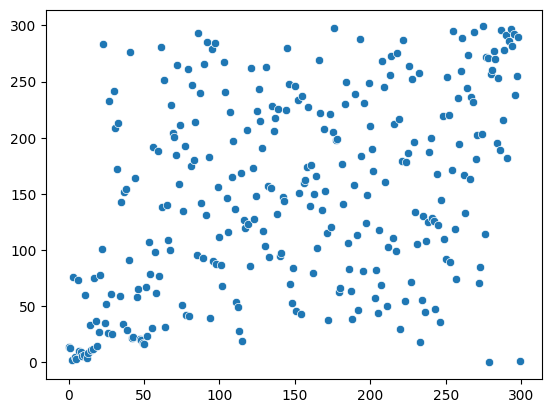

In [115]:
sns.scatterplot(x = range(len(ranks)), y = [r['corpus_id'] for r in ranks])

In [68]:
texts[142]

'Recommendation as Instruction Following: A Large Language Model Empowered Recommendation Approach In the past decades, recommender systems have attracted much attention in both research and industry communities. Existing recommendation models mainly learn the underlying user preference from historical behavior data (typically in the forms of item IDs), and then estimate the user-item matching relationships for recommendations. Inspired by the recent progress on large language models (LLMs), we develop a different recommendation paradigm, considering recommendation as instruction following by LLMs. The key idea is that the needs of a user can be expressed in natural language descriptions (called instructions), so that LLMs can understand and further execute the instruction for fulfilling the recommendation. For this purpose, we instruction tune the 3B Flan-T5-XL, to better adapt LLMs to recommender systems. We first design a general instruction format for describing the preference, int

In [96]:
ranks

[{'corpus_id': 14, 'score': 7.3867188},
 {'corpus_id': 13, 'score': 7.28125},
 {'corpus_id': 2, 'score': 7.2148438},
 {'corpus_id': 5, 'score': 6.7382812},
 {'corpus_id': 3, 'score': 6.6835938},
 {'corpus_id': 10, 'score': 6.6601562},
 {'corpus_id': 9, 'score': 6.65625},
 {'corpus_id': 6, 'score': 6.6367188},
 {'corpus_id': 7, 'score': 6.6289062},
 {'corpus_id': 4, 'score': 6.3476562},
 {'corpus_id': 8, 'score': 6.0507812},
 {'corpus_id': 11, 'score': 5.9570312},
 {'corpus_id': 12, 'score': 5.9375},
 {'corpus_id': 15, 'score': 5.7070312},
 {'corpus_id': 27, 'score': 5.703125},
 {'corpus_id': 26, 'score': 5.2304688},
 {'corpus_id': 25, 'score': 4.7421875},
 {'corpus_id': 29, 'score': 4.1835938},
 {'corpus_id': 22, 'score': 3.9414062},
 {'corpus_id': 23, 'score': 3.8632812},
 {'corpus_id': 21, 'score': 3.7578125},
 {'corpus_id': 20, 'score': 3.7226562},
 {'corpus_id': 16, 'score': 3.6601562},
 {'corpus_id': 17, 'score': 3.515625},
 {'corpus_id': 24, 'score': 3.078125},
 {'corpus_id': 28,

## Semantic Scholar Bulk
bad search

In [70]:
query = '''large language models recommender systems marketing'''  # replace with your actual query
base_url = "https://api.semanticscholar.org/graph/v1/paper/search/bulk"
pages_to_fetch = 1
limit = 100
fields_str = "title,abstract,year,citationCount,journal,authors"

all_results = []
for p in range(0, pages_to_fetch):
    print(p)
    time.sleep(1.1)
    params = {
        "query": query,
        "fields": fields_str,
        # "limit": limit,
        # 'offset':p*limit,
    }
    headers = {
        "x-api-key": semantic_scholar_api_key
    }
    try:
        response = requests.get(base_url, params=params, headers=headers)
        response.raise_for_status()  # raises an exception for 4xx/5xx errors
        data = response.json()
        results = data['data']
        all_results.extend(results)
    except requests.exceptions.RequestException as e:
        print(f"API request failed: {e}")

0


In [74]:
fields = ['title',
 'abstract',
 'year',
 'citationCount',
 'journal',
 'authors',
 ]
all_results_clean = [{k:r.get(k) for k in fields} for r in all_results]
texts = [(r['title'] or '') + ' ' + (r['abstract'] or '') for r in all_results_clean]
texts

['Computational Linguistics and Intelligent Text Processing ',
 'ExaAUAC: Arabic Twitter user age prediction corpus based on language and metadata features Twitter is a rich resource for analyzing the contents of social media and extracting the age groups of users can be beneficial for recommender systems, marketing and advertising. Age detection task is an aspect of demographic information of users. In this study a large-scale corpus of Arabic Twitter users including 181k user profiles with diverse age groups consisting of −18, 18–24, 25–34, 35–49, 50–64, +65 is presented. The corpus is created by four methods: (1) collecting publicly available birthday announcement tweets using the Twitter Search application programming interface, (2) augmenting data, (3) fetching verified accounts, and (4) manual annotation. To have a best age detection model on the presented corpus, different evaluations are tested to find the model with highest accuracy and efficiency. Number of tweets, regression